In [1]:
from Node.Node import Control_node
import numpy as np
import time
import pylab as pl
from IPython import display

In [20]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[.1,0],
               [0,0.1]])
B2 = np.array([[0,0],
               [0,0]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[0.4,0],
               [0,0.4]])
A2 = np.array([[0.4,0],
               [0,0.4]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.3,0.7])
R2 = np.array([0,0])

# Initial behavior
behav_1 = np.array([0.6,0.6])

# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    print("CONTROLLER COMPARISON")
    print("reference: ", reference)
    print("sensory: ",sensory_signal)
    print("error: ", error)
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = behavioral_model @ error
    print("control output: ", output)
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate



# agent two acts as the plant (error = control output)
def plant_control(error, behavioral_model, previous_output):
    print("PLANT")
    print("prev output: ", previous_output)
    print("error: ", error)
    output = previous_output + error
    print("new output: ", output)
    print("\n")
    #output = behavioral_model @ error
    return output

# just get the control output
def plant_compare(sensory_signal, reference, prediction):
    error = sensory_signal
    return error
    
# behavior = last observation * behavioral model (like a motor command u)
# output = your behavior * est

In [21]:
agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
plant = Control_node(sensor=sense, comparator=plant_compare, control_update=control_update,  controller = plant_control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_1)


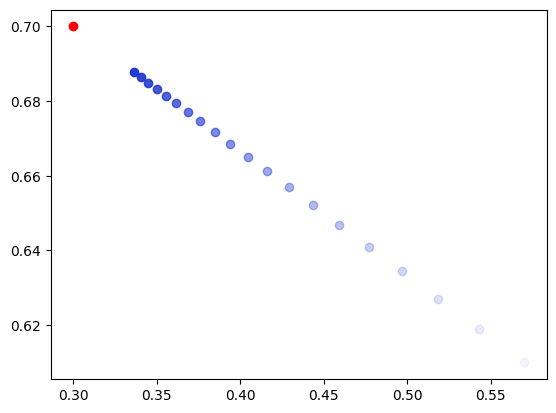

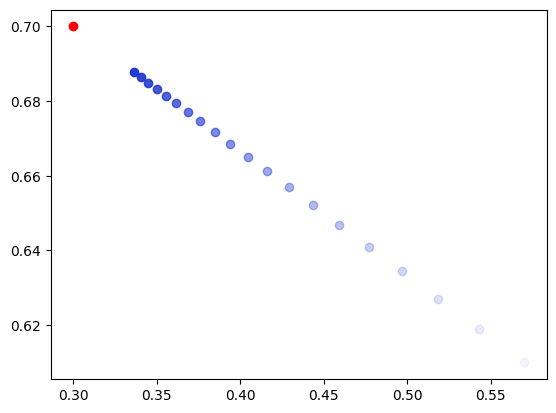

In [22]:
%matplotlib inline
trials = 20
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
behavior1 = np.array([0,0])
controller_error = []
agent1_behaviors = []
plant_outputs = []

state = np.array([0.6,0.6])
agent1_error = []

pl.scatter(R1[0],R1[1], c='red')
for t in range(trials):
    b1 = agent1.go(state)   
    plant_output = plant.go(b1)

    agent1_behaviors.append(agent1.get_output())
    plant_outputs.append(plant.get_output())
    controller_error.append(agent1.get_error())
    agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    behavior1 = b1
    state = plant_output
    
    color = [0.1,0.2,0.8, (t+1)/(trials+1)]
    pl.scatter(plant_output[0],plant_output[1],c=tuple(color))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.5)

In [23]:
for t in range(trials):
    print(t)
    print("REFERENCE")
    print(R1)
    print("CONTROLLER ERRORS")
    print(controller_error[t])
    print(agent1_error[t])
    print("CONTROLLER OUTPUTS")
    print(agent1_behaviors[t])
    print("PLANT OUTPUTS")
    print(plant_outputs[t])
    print("\n")

    

0
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.3  0.1]
0.19999999999999998
CONTROLLER OUTPUTS
[-0.03  0.01]
PLANT OUTPUTS
[0.57 0.61]


1
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.27  0.09]
0.17999999999999997
CONTROLLER OUTPUTS
[-0.027  0.009]
PLANT OUTPUTS
[0.543 0.619]


2
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.243  0.081]
0.16199999999999995
CONTROLLER OUTPUTS
[-0.0243  0.0081]
PLANT OUTPUTS
[0.5187 0.6271]


3
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.2187  0.0729]
0.14579999999999996
CONTROLLER OUTPUTS
[-0.02187  0.00729]
PLANT OUTPUTS
[0.49683 0.63439]


4
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.19683  0.06561]
0.13121999999999995
CONTROLLER OUTPUTS
[-0.019683  0.006561]
PLANT OUTPUTS
[0.477147 0.640951]


5
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.177147  0.059049]
0.11809799999999993
CONTROLLER OUTPUTS
[-0.0177147  0.0059049]
PLANT OUTPUTS
[0.4594323 0.6468559]


6
REFERENCE
[0.3 0.7]
CONTROLLER ERRORS
[-0.1594323  0.0531441]
0.10628819999999994
CONTROLLER OUTPUTS
[-0.01594